In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set the display format for float numbers
pd.set_option('display.float_format', '{:.2f}'.format)


In [3]:
authors = pd.read_csv('../clean_data/authors100.csv')


In [13]:
authors[955:]

,Name,Birth Year,Genres,Books
955,Mal Peet,1947.00,Young adult historical fiction; children's pic...,[]
956,Alison Lurie,1926.00,NaN,[]
957,John Ringo,1963.00,"Science fiction, military science fiction, mil...",[]
958,Elizabeth George Speare,NaN,NaN,NaN
959,Phyllis Reynolds Naylor,NaN,NaN,NaN
...,...,...,...,...
2116,Li Zhisui,NaN,NaN,NaN
2117,Steve Perry,NaN,NaN,NaN
2118,E.L. Konigsburg,NaN,NaN,NaN
2119,Louis Guilloux,NaN,NaN,NaN


In [147]:
# Read the CSV file
input_folder = '../dirty_data/'
output_folder = '../generated_data/'

books_df = pd.read_csv(input_folder + 'Books.csv')
user_df = pd.read_csv(input_folder + 'users.csv')
rating_df = pd.read_csv(input_folder + 'Ratings.csv')

# Remove extra columns 
books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'Publisher'], axis=1, inplace=True)

C:\Users\Noel Nathan\AppData\Local\Temp\ipykernel_41016\80792343.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(input_folder + 'Books.csv')


In [148]:
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication
count,271360,271360,271358,271360
unique,271360,242135,102022,202
top,0195153448,Selected Poems,Agatha Christie,2002
freq,1,27,632,13903


Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64


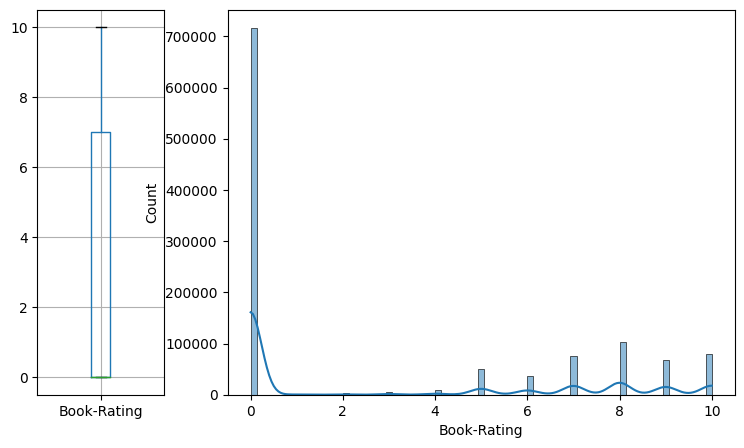

In [151]:
name = 'Book-Rating'
_ = fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
_ = rating_df.boxplot(column=name,ax=axes[0]);
_ = sns.histplot(x=name, data=rating_df, ax=axes[1], kde=True)
_ = plt.xlabel(name)

print(rating_df[name].value_counts())
rating_df = rating_df[rating_df['Book-Rating'] != 0]

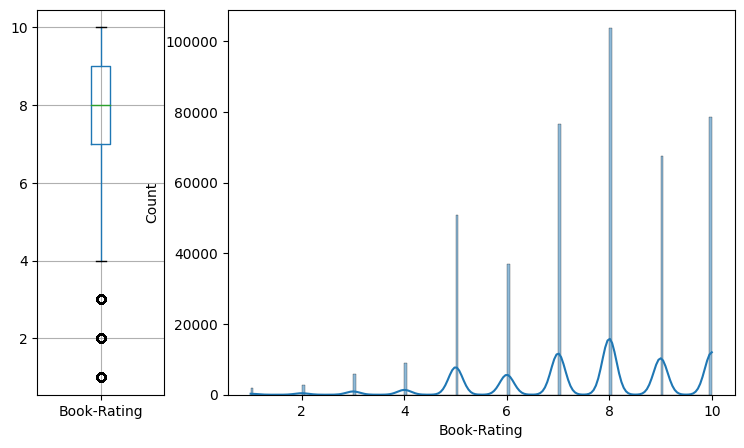

In [152]:
_ = fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
_ = rating_df.boxplot(column=name,ax=axes[0]);
_ = sns.histplot(x=name, data=rating_df, ax=axes[1], kde=True)
_ = plt.xlabel(name)

### Deal with missing values

In [153]:
print(books_df.isna().sum())
# Remove rows with missing values
books_df.dropna(inplace=True)

print(rating_df.isna().sum())

print(user_df.isna().sum())

# La edad es importante?

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
dtype: int64
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
User-ID          0
Location         0
Age         110762
dtype: int64


Hay libros que se han publicado varias veces. Pero nosotros queremos que cada libro tenga solo una publicación, así podemos sacarle más potencial al rating porque tendremos más datos en cada libro. Para lograr esto, eliminaremos todas las publicaciones de la base de datos menos una para no tener repeticiones. 

In [154]:
print(books_df['ISBN'].nunique())
print(rating_df['ISBN'].nunique())
print(rating_df.count())

271358
185973
User-ID        433671
ISBN           433671
Book-Rating    433671
dtype: int64


In [155]:
rating_df = pd.merge(rating_df, books_df[['ISBN', 'Book-Title']], on='ISBN', how='left')
rating_df.isna().sum()
rating_df.dropna(inplace=True)
rating_df.drop(['ISBN'], axis=1, inplace=True)
books_df.drop(['ISBN'], axis=1, inplace=True)
books_df.drop_duplicates(subset='Book-Title', keep='first', inplace=True)

---


In [156]:
import pandas as pd

# Read the booksummaries.txt file as a CSV
booksummaries_df = pd.read_csv(input_folder + 'booksummaries.txt', delimiter='\t', names=['Wikipedia ID', 'Freebase ID', 'Book Title', 'Author', 'Publication Date', 'Genres', 'Summary'])

print(booksummaries_df.isna().sum())
booksummaries_df


Wikipedia ID           0
Freebase ID            0
Book Title             0
Author              2382
Publication Date    5610
Genres              3718
Summary                0
dtype: int64


,Wikipedia ID,Freebase ID,Book Title,Author,Publication Date,Genres,Summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
...,...,...,...,...,...,...,...
16554,36934824,/m/0m0p0hr,Under Wildwood,Colin Meloy,2012-09-25,NaN,"Prue McKeel, having rescued her brother from ..."
16555,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...
16556,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...
16557,37132319,/m/0n4bqb1,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,NaN,Colbert addresses topics including Wall Stree...


In [157]:
booksummaries_df['Wikipedia ID'] = booksummaries_df['Wikipedia ID'].astype(str)

# Remove rows with the same book title
booksummaries_df.drop_duplicates(subset='Book Title', keep='first', inplace=True)
booksummaries_df.describe()

,Wikipedia ID,Freebase ID,Book Title,Author,Publication Date,Genres,Summary
count,16277,16277,16277,13943,10774,12613,16277
unique,16277,16277,16277,4677,2614,2133,16250
top,620,/m/0hhy,Animal Farm,Agatha Christie,2006,"{""/m/05hgj"": ""Novel""}",~Plot outline description~ --> <!--
freq,1,1,1,73,166,832,13


In [158]:
# Initialize a counter variable
count = 0
books_titles = set(books_df['Book-Title'].values)



# Iterate through each row in the booksummaries_df database
for index, row in booksummaries_df.iterrows():
    # Check if the book title exists in the books_df database
    if row['Book Title'] in books_titles:
        # Increment the counter
        count += 1
    else:
        print(row['Book Title'])

# Print the count
print(count)


A Fire Upon the Deep
Anyone Can Whistle
Blade Runner 3: Replicant Night
Blade Runner 2: The Edge of Human
Book of Joshua
Book of Ezra
Book of Ruth
Book of Esther
Book of Job
Book of Hosea
Book of Jonah
Book of Micah
Book of Haggai
Candide, ou l'Optimisme
Chapterhouse Dune
Deuteronomy
Darwin's Dangerous Idea
Death of a Hero
Farmer Giles of Ham
Gylfaginning
God Emperor of Dune
Leviticus
Leaf by Niggle
Moby-Dick; or, The Whale
Moonfleet
No Logo
On War
Time out of Joint
Pacific Overtures
Rosencrantz & Guildenstern Are Dead
Speaker for the Dead
The Shockwave Rider
The Book of the City of Ladies
Through the Looking-Glass
Keep the Aspidistra Flying
Lions' Commentary on UNIX 6th Edition, with Source Code
The Myth of Sisyphus
Amadeus
The Eye of the World
The Great Hunt
A Crown of Swords
Winter's Heart
Lady Audley's Secret
The Queen of the Damned
Ramayana
Mutiny on the Bounty
The Memory of Earth
The Hunting of the Snark
Methuselah's Children
King Ottokar's Sceptre
An Inspector Calls
Flow My Tear

In [159]:
# Get the set of book titles from both datasets
books_df_titles = set(books_df['Book-Title'].values)
booksummaries_df_titles = set(booksummaries_df['Book Title'].values)

# Find the common book titles
common_titles = books_df_titles.intersection(booksummaries_df_titles)

# Filter the books_df and booksummaries_df datasets based on the common titles
common_books_df = books_df[books_df['Book-Title'].isin(common_titles)]
common_booksummaries_df = booksummaries_df[booksummaries_df['Book Title'].isin(common_titles)]

# Create a new database with the common books
common_books_db = pd.merge(common_books_df, common_booksummaries_df, left_on='Book-Title', right_on='Book Title')

print(common_books_db.shape)

# When the Book-Title column is empty, replace it with the Book Title column
common_books_db.loc[common_books_db['Book Title'].isna() & ~common_books_db['Book-Title'].isna(), 'Book Title'] = common_books_db['Book-Title']
common_books_db.loc[common_books_db['Author'].isna() & ~common_books_db['Book-Author'].isna(), 'Author'] = common_books_db['Book-Author']
common_books_db.loc[common_books_db['Publication Date'].isna() & ~common_books_db['Year-Of-Publication'].isna(), 'Publication Date'] = common_books_db['Year-Of-Publication']

# Remove extra columns
common_books_db.drop(['Book-Title', 'Book-Author', 'Year-Of-Publication'], axis=1, inplace=True)




print(rating_df.shape)
# In ratings dataset, remove the rows with ISBNs that are not in the common books dataset
rating_df = rating_df[rating_df['Book-Title'].isin(common_titles)]
print(rating_df.shape)


# View the common books database
common_books_db


(5852, 10)
(383840, 3)
(60260, 3)


,Wikipedia ID,Freebase ID,Book Title,Author,Publication Date,Genres,Summary
0,7956168,/m/026lcx6,The Kitchen God's Wife,Amy Tan,1991,NaN,The Kitchen God's Wife opens with the narrati...
1,1703697,/m/05pr53,The Testament,John Grisham,1999-02-02,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...","Troy Phelan, an eccentric elderly billionaire..."
2,999996,/m/03y389,Airframe,Michael Crichton,1996,"{""/m/06n90"": ""Science Fiction"", ""/m/05hgj"": ""N...",The novel opens aboard Hong Kong-based Transp...
3,1298672,/m/04qyx7,Timeline,Michael Crichton,1999-11,"{""/m/06n90"": ""Science Fiction"", ""/m/02xlf"": ""F...","In the middle of the New Mexico desert, a vac..."
4,73408,/m/0jqbz,To Kill a Mockingbird,Harper Lee,1960-07-11,"{""/m/02xlf"": ""Fiction""}",The book opens with the Finch family's ancest...
...,...,...,...,...,...,...,...
5847,466228,/m/02cx44,The Autumn of the Patriarch,Gabriel García Márquez,1975,"{""/m/05hgj"": ""Novel""}",The book is written in long paragraphs with e...
5848,9903238,/m/02pwh_r,"Faith, Science and Understanding",John Polkinghorne,2001,NaN,In 1. Theology in the University Polkinghorne...
5849,23328624,/m/09k7b62,Wild Geese,Martha Ostenso,1925,"{""/m/0hwxm"": ""Historical novel""}","Lind Archer, a teacher from the city, has com..."
5850,9957859,/m/02py2vr,Armadale,Wilkie Collins,1864,"{""/m/014dfn"": ""Speculative fiction"", ""/m/02p0s...",The novel has a convoluted plot about two dis...


## Preprocessing

In [160]:
common_books_db.isna().sum()

Wikipedia ID          0
Freebase ID           0
Book Title            0
Author                0
Publication Date      0
Genres              807
Summary               0
dtype: int64

Publication date transform to year of publication

In [161]:
# Get year from the publication date
# Split by " " or "-"
# Get the element with length 4

def get_year(date):
    if date == float('nan'):
        return date
    
    date = str(date)

    date = re.split('\s|-', date)
    for element in date:
        if len(element) == 4:
            return element
    return float('nan')


# Apply the get_year function to the Publication Date column
common_books_db['Publication Date'] = common_books_db['Publication Date'].apply(get_year)

# Rename the columns
common_books_db.rename(columns={'Publication Date': 'Publication Year'}, inplace=True)

In [162]:
common_books_db.isna().sum()

Wikipedia ID          0
Freebase ID           0
Book Title            0
Author                0
Publication Year     28
Genres              807
Summary               0
dtype: int64

In [163]:
common_books_db['Genres'][1]

'{"/m/01jfsb": "Thriller", "/m/02xlf": "Fiction", "/m/0c3351": "Suspense"}'

In [164]:
import json
import numpy as np


def preprocess_genre(genre):
    genre = str(genre)
    if genre == "nan":
        return genre

    # Replace single quotes with double quotes
    # print(genre)
    # genre = genre.replace("'", "\"")

    # Convert the JSON string to a dictionary
    genre_dict = json.loads(genre)
    
    # Extract the values from the dictionary
    genre_values = list(genre_dict.values())
    
    return genre_values
    


# Apply the preprocess_genre function to the Genres column

common_books_db['Genres'] = common_books_db['Genres'].apply(preprocess_genre)

# Get all the unique genres
genres = set()
for genre in common_books_db['Genres']:
    if genre is not np.nan:
        genres.update(genre)

# Print the genres
genres

{'Absurdist fiction',
 'Adventure',
 'Adventure novel',
 'Albino bias',
 'Alien invasion',
 'Alternate history',
 'American Gothic Fiction',
 'Anthology',
 'Anthropology',
 'Anti-nuclear',
 'Anti-war',
 'Apocalyptic and post-apocalyptic fiction',
 'Autobiographical novel',
 'Autobiography',
 'Bangsian fantasy',
 'Bildungsroman',
 'Biographical novel',
 'Biography',
 'Black comedy',
 'Business',
 'Cabal',
 'Campus novel',
 'Catastrophic literature',
 'Chick lit',
 "Children's literature",
 'Chivalric romance',
 'Colonial United States romance',
 'Comedy',
 'Comedy of manners',
 'Comic book',
 'Comic fantasy',
 'Comic novel',
 'Comic science fiction',
 'Comics',
 'Coming of age',
 'Conspiracy',
 'Conspiracy fiction',
 'Contemporary fantasy',
 'Cozy',
 'Crime Fiction',
 'Cyberpunk',
 'Dark fantasy',
 'Detective fiction',
 'Drama',
 'Dying Earth subgenre',
 'Dystopia',
 'Economics',
 'Elizabethan romance',
 'Epic Science Fiction and Fantasy',
 'Epistolary novel',
 'Ergodic literature',
 'E

## Contamos cuantos ratings tiene cada libro

In [165]:
rating_df.rename(columns={'Book-Title': 'Book Title'}, inplace=True)
book_ratings_count = rating_df.groupby('Book Title').size().reset_index(name='Rating Count')

common_books_db = pd.merge(common_books_db, book_ratings_count, on='Book Title', how='left')

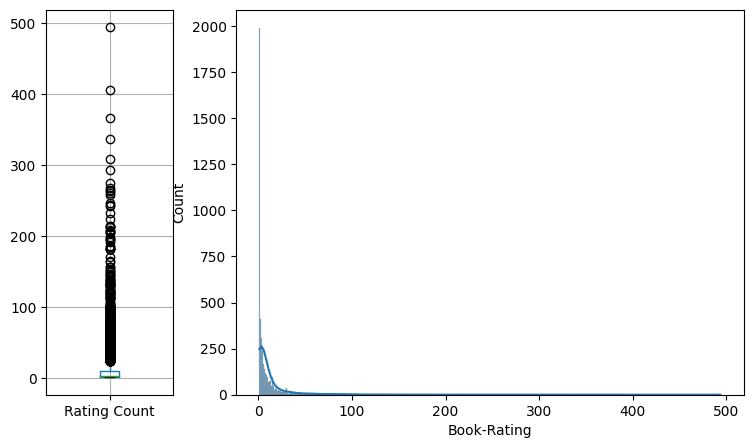

In [166]:
_ = fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
_ = book_ratings_count.boxplot(column='Rating Count',ax=axes[0]);
_ = sns.histplot(x='Rating Count', data=book_ratings_count, ax=axes[1], kde=True)
_ = plt.xlabel("Book-Rating")

In [167]:
min_rating = 0
max_rating = 1000

print(common_books_db.shape)
books_within_range = common_books_db[(common_books_db['Rating Count'] >= min_rating) & (common_books_db['Rating Count'] <= max_rating)]
books_within_range.shape

(5852, 8)


(4737, 8)

We have successfully removed the books and the associated ratings that needed to be removed

In [168]:
print(rating_df.shape)
rating_df = rating_df[rating_df['Book Title'].isin(books_within_range['Book Title'])]
print(rating_df.shape)

(60260, 3)
(60260, 3)


In [169]:
user_ratings_count = rating_df.groupby('User-ID').size().reset_index(name='Rating Count')
user_df = pd.merge(user_df, user_ratings_count, on='User-ID', how='left')

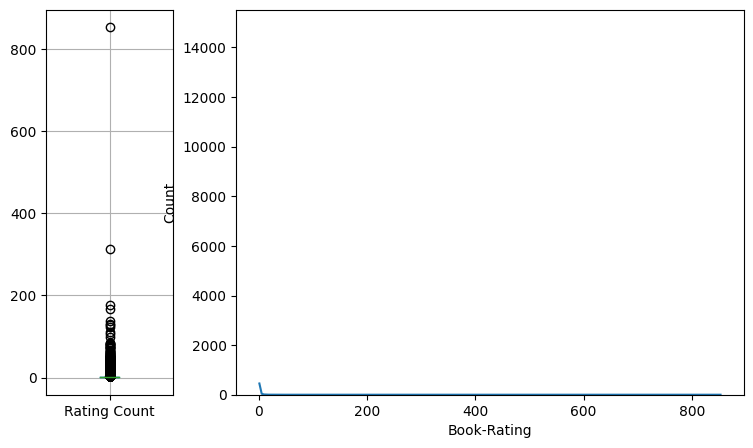

In [170]:
_ = fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
_ = user_ratings_count.boxplot(column='Rating Count',ax=axes[0]);
_ = sns.histplot(x='Rating Count', data=user_ratings_count, ax=axes[1], kde=True)
_ = plt.xlabel("Book-Rating")

Seleccionamos aquellos usuarios que tengan un número grande de ratings pero tampoco demasiado grande.

In [171]:

min_rating = 5
max_rating = 200

users_within_range = user_df[(user_df['Rating Count'] >= min_rating) & (user_df['Rating Count'] <= max_rating)]
users_within_range.shape

(2552, 4)

0.25    6.00
0.50    8.00
0.75   13.00
Name: Rating Count, dtype: float64


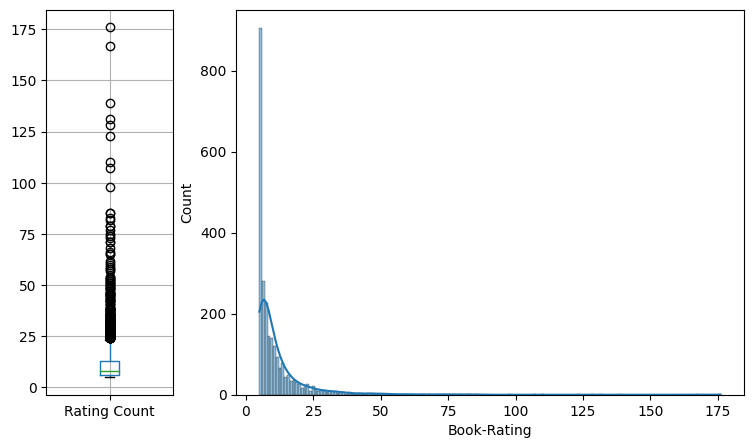

In [172]:
_ = fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
_ = users_within_range.boxplot(column='Rating Count',ax=axes[0]);
_ = sns.histplot(x='Rating Count', data=users_within_range, ax=axes[1], kde=True)
_ = plt.xlabel(name)

quartiles = users_within_range['Rating Count'].quantile([0.25, 0.5, 0.75])
print(quartiles)


In [173]:
# Remove ratings from users not in the users_within_range dataset
rating_df = rating_df[rating_df['User-ID'].isin(users_within_range['User-ID'])]

print(rating_df.shape)
print(users_within_range['Rating Count'].sum())

(29836, 3)
29836.0


# Calculate average rating for users and books

In [174]:
user_avg_rating = rating_df.groupby('User-ID')['Book-Rating'].mean()
user_avg_rating = user_avg_rating.reset_index(name='Average Rating')
users_within_range = pd.merge(users_within_range, user_avg_rating, on='User-ID', how='left')

users_within_range

,User-ID,Location,Age,Rating Count,Average Rating
0,243,"arden hills, minnesota, usa",NaN,7.00,8.14
1,254,"minneapolis, minnesota, usa",24.00,12.00,8.58
2,638,"san diego, california, usa",20.00,19.00,9.47
3,805,"sonoma, california, usa",34.00,6.00,9.00
4,882,"berkeley, california, usa",23.00,6.00,10.00
...,...,...,...,...,...
2547,278202,"coral springs, florida, usa",NaN,5.00,4.60
2548,278418,"omaha, nebraska, usa",NaN,13.00,6.46
2549,278582,"slidell, louisiana, usa",NaN,5.00,8.40
2550,278633,"sandy, utah, usa",NaN,12.00,8.00


In [175]:
book_average_rating = rating_df.groupby('Book Title')['Book-Rating'].mean()
book_average_rating = book_average_rating.reset_index(name='Average Rating')
books_within_range = pd.merge(books_within_range, book_average_rating, on='Book Title', how='left')
books_within_range

,Wikipedia ID,Freebase ID,Book Title,Author,Publication Year,Genres,Summary,Rating Count,Average Rating
0,7956168,/m/026lcx6,The Kitchen God's Wife,Amy Tan,1991,nan,The Kitchen God's Wife opens with the narrati...,116.00,8.28
1,1703697,/m/05pr53,The Testament,John Grisham,1999,"[Thriller, Fiction, Suspense]","Troy Phelan, an eccentric elderly billionaire...",261.00,7.54
2,999996,/m/03y389,Airframe,Michael Crichton,1996,"[Science Fiction, Novel]",The novel opens aboard Hong Kong-based Transp...,129.00,7.72
3,1298672,/m/04qyx7,Timeline,Michael Crichton,1999,"[Science Fiction, Fiction, Suspense]","In the middle of the New Mexico desert, a vac...",263.00,8.05
4,73408,/m/0jqbz,To Kill a Mockingbird,Harper Lee,1960,[Fiction],The book opens with the Finch family's ancest...,267.00,9.04
...,...,...,...,...,...,...,...,...,...
4732,4760716,/m/0clxxp,The Game-Players of Titan,Philip K. Dick,1963,"[Science Fiction, Speculative fiction, Fantasy]","Pete Garden, the protagonist, is one of sever...",1.00,7.00
4733,480566,/m/02fmjq,Galactic Pot-Healer,Philip K. Dick,1969,"[Science Fiction, Speculative fiction, Fiction]",The novel takes place in a dismal future Amer...,1.00,8.00
4734,2497286,/m/07h_l2,Solar Lottery,Philip K. Dick,1955,"[Science Fiction, Speculative fiction, Fiction]",Solar Lottery takes place in a world dominate...,1.00,7.00
4735,23616820,/m/06zktr5,Le Sang noir,Louis Guilloux,1935,nan,"One day in 1917 an aging philosophy tutor, ni...",1.00,NaN


In [176]:
users_within_range.to_csv(output_folder + 'users.csv', index=False)
rating_df.to_csv(output_folder + 'ratings.csv', index=False)
books_within_range.to_csv(output_folder + 'books.csv', index=False)
